In [1]:
"""" 
test plot hwrf data (nc files) under smb://mule/disk3/projects/tc2022/tc2023/coupled_models/
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [2]:
storm = 'lee13l'
datestr = '20230907'
path = '/Volumes/disk3/projects/tc2022/tc2023/coupled_models/'+storm+'/'+datestr+'/hwrf/'
filenames_all = np.sort( os.listdir(path) )
filenames = np.array([])
for file in filenames_all: ### look for days of 10/24 - BT testing period
    if '.nc' in file:
        filenames = np.append(filenames, file)
print(filenames)

['lee13l.2023090700.wrfdiag_d03.nc' 'lee13l.2023090712.wrfdiag_d03.nc']


In [4]:
### Read hwrf data
ds = nc.Dataset(path+filenames[0])
# print(ds)
str_vars = ['TAUX','TAUY','XTIME','HLON','HLAT','SUSWIND']
for str_var_i in str_vars:
    temp = ds.variables[str_var_i][:]
    str_exec = str_var_i+'= temp'
    exec(str_exec)
dtime = np.array([datetime.datetime(2023,9,7)+datetime.timedelta(minutes=int(min)) for min in XTIME])
print(dtime[0:3],dtime[-1])

[datetime.datetime(2023, 9, 7, 0, 0) datetime.datetime(2023, 9, 7, 1, 0)
 datetime.datetime(2023, 9, 7, 2, 0)] 2023-09-12 06:00:00


In [ ]:
# ### load topography data
# path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_24_Jul_2024/'
# ds_topo = nc.Dataset(path_topo+'gebco_2024_n35.0_s5.0_w-92.0_e-50.0.nc')
# # print(ds_topo)
# lon_topo = ds_topo.variables['lon'][:]
# lat_topo = ds_topo.variables['lat'][:]
# elevation = ds_topo.variables['elevation'][:]
# print(lon_topo.shape, lat_topo.shape, elevation.shape )
# ilon = np.where( lon_topo>= -70 )[0]
# ilat = np.where( lat_topo>= 10 )[0]

(10080,) (7200,) (7200, 10080)


/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_74162/3062340156.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = plt.pcolormesh(HLON[i,:,:],HLAT[i,:,:],SUSWIND[i,:,:],vmin=0,vmax=70,cmap='turbo')


<Figure size 432x288 with 0 Axes>

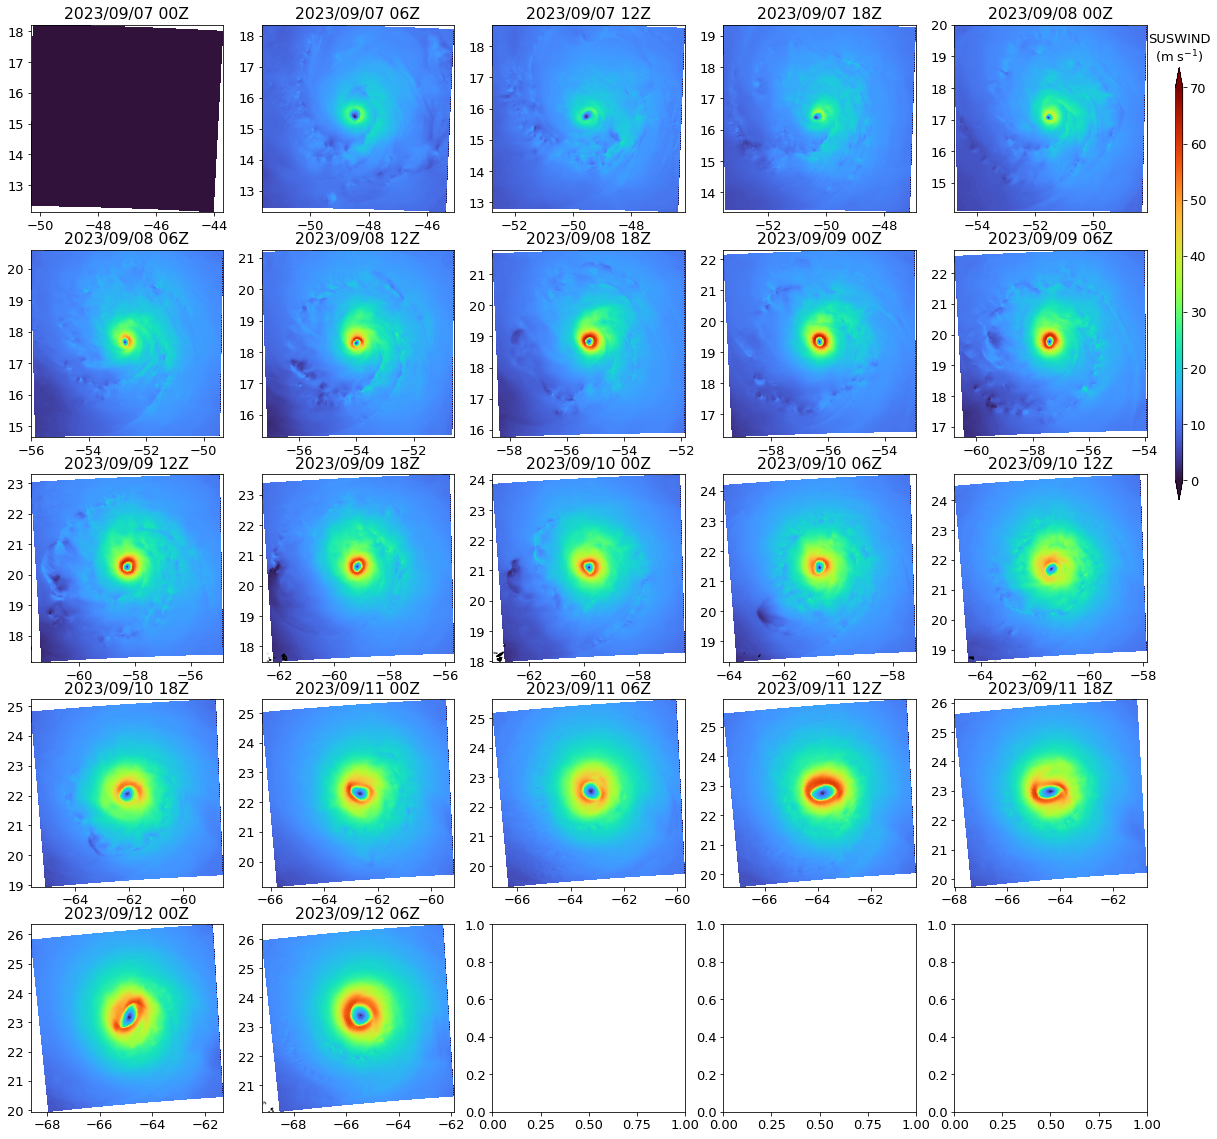

In [ ]:
### plot SUSWIND
nrow = 5
ncol = 5
plt.clf()
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(20,20)
nsub = 0
for i in range(0,len(dtime),6):
    nsub = nsub + 1
    plt.subplot(nrow,ncol,nsub)
    lonlim = [np.nanmin(HLON[i,:,:]), np.nanmax(HLON[i,:,:])]
    latlim = [np.nanmin(HLAT[i,:,:]), np.nanmax(HLAT[i,:,:])]
    sc = plt.pcolormesh(HLON[i,:,:],HLAT[i,:,:],SUSWIND[i,:,:],vmin=0,vmax=70,cmap='turbo')
    # plt.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
    plt.title(dtime[i].strftime('%Y/%m/%d %HZ'))
    plt.xlim(lonlim)
    plt.ylim(latlim)
### colorbar
cbar_ax = fig.add_axes([.92,.55,.005,.3])
axf = plt.colorbar(sc,orientation='vertical',cax=cbar_ax,extend='both')
cbar_ax.set_title('SUSWIND\n(m s$^{-1}$)',fontsize=13) # fraction day of the month
### save figure
plt.savefig('maps_SUSWIND_'+storm+'_'+datestr+'.png',dpi=400,bbox_inches='tight')

/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_74162/13396189.py:19: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = plt.pcolormesh(HLON[i,:,:],HLAT[i,:,:],varplot,cmap='seismic',vmin=varlim[0],vmax=varlim[1])


<Figure size 432x288 with 0 Axes>

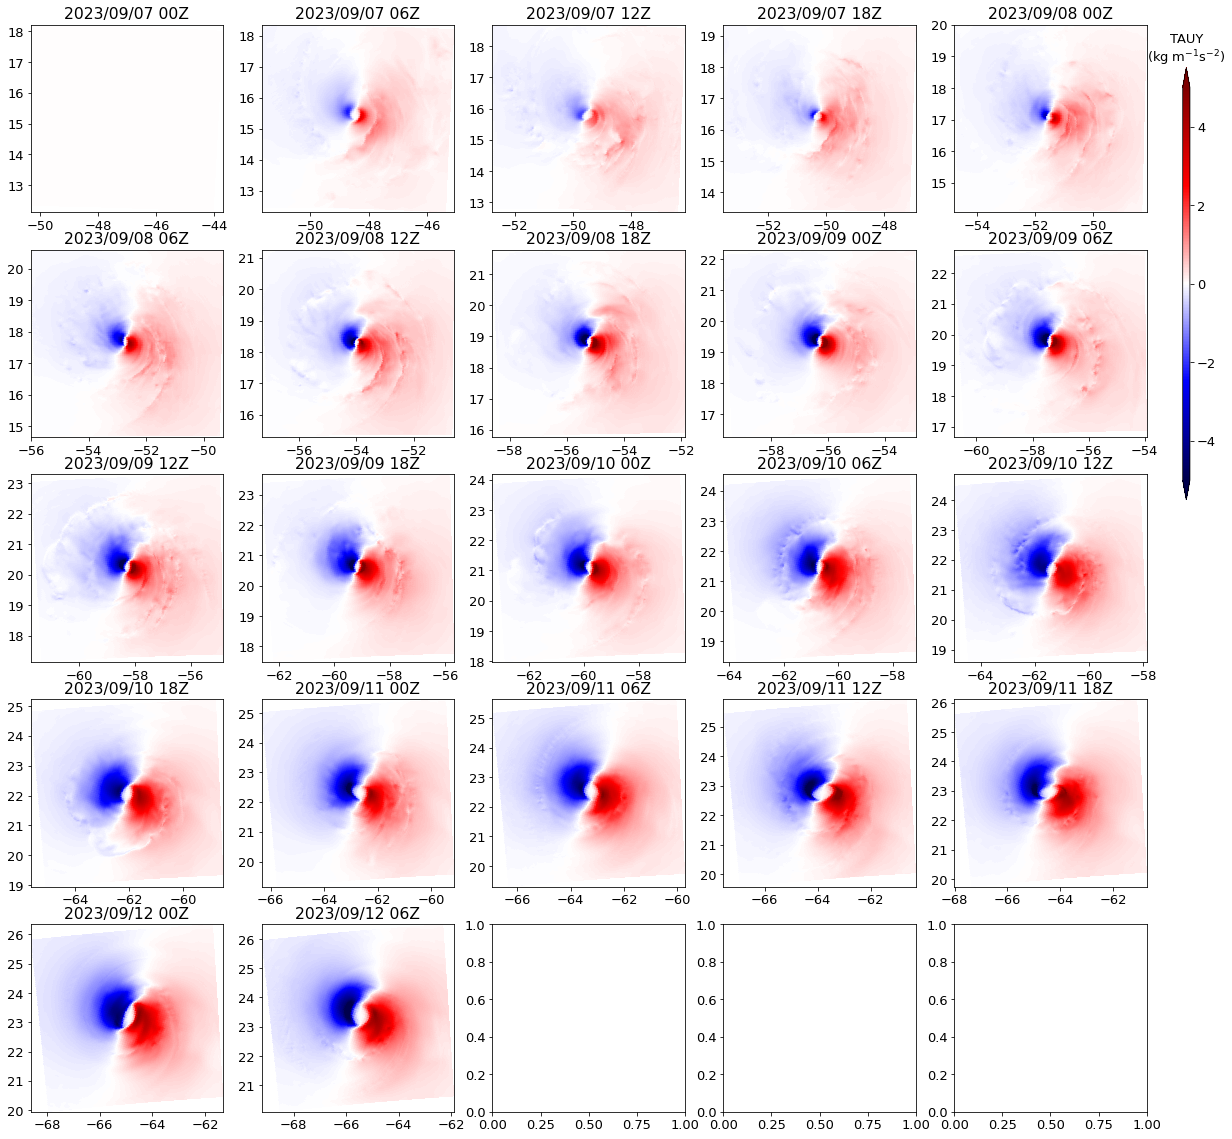

In [40]:
### plot TAUX, TAUY
varnm = 'TAUY'
unit = '(kg m$^{-1}$s$^{-2}$)'
varlim = [-5,5]
###
nrow = 5
ncol = 5
plt.clf()
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_size_inches(20,20)
nsub = 0
for i in range(0,len(dtime),6):
    nsub = nsub + 1
    plt.subplot(nrow,ncol,nsub)
    lonlim = [np.nanmin(HLON[i,:,:]), np.nanmax(HLON[i,:,:])]
    latlim = [np.nanmin(HLAT[i,:,:]), np.nanmax(HLAT[i,:,:])]
    varplot = eval(varnm+'[i,:,:]')
    sc = plt.pcolormesh(HLON[i,:,:],HLAT[i,:,:],varplot,cmap='seismic',vmin=varlim[0],vmax=varlim[1])
    # plt.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
    plt.title(dtime[i].strftime('%Y/%m/%d %HZ'))
    plt.xlim(lonlim)
    plt.ylim(latlim)
### colorbar
cbar_ax = fig.add_axes([.925,.55,.005,.3])
axf = plt.colorbar(sc,orientation='vertical',cax=cbar_ax,extend='both')
cbar_ax.set_title(varnm+'\n'+unit,fontsize=13) # fraction day of the month
### save figure
plt.savefig('maps_'+varnm+'_'+storm+'_'+datestr+'.png',dpi=400,bbox_inches='tight')

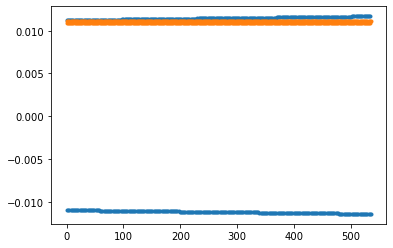

In [5]:
plt.plot(np.diff(HLON[0,:,0]),'.')
plt.plot(np.diff(HLAT[0,:,0]),'.')